**Predict Customer Churn using dataset from Kaggle** 

In [15]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot
%matplotlib inline

Churn_df = pd.read_csv('Churn_Modelling.csv')

**Get info on columns in dataset** 

In [16]:
Churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Find shape of dataset**

In [17]:
Churn_df.shape

(10000, 14)

**Display first 5 rows of dataset**

In [18]:
Churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Display last 5 rows**

In [19]:
Churn_df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Find unique rows in Geography for converting to categorical values later**

In [20]:
Churn_df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

**Find unique rows in Gender for converting to categorical values later**

In [21]:
Churn_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

**Find # of null rows

In [22]:
Churn_df.isna().sum().sum()

0

**Count of customers exited and stayed**

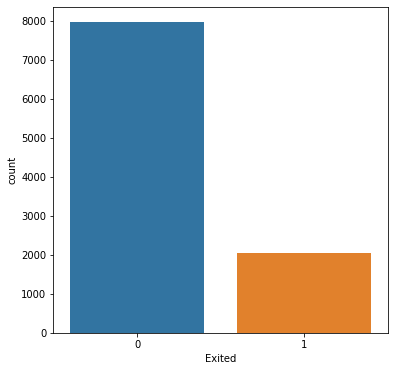

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x=Churn_df['Exited'])
plt.show()

**Display Column names # of nulls and datatype** 

In [24]:
Churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Create Box plots of numeric variables in dataset compared to exited**

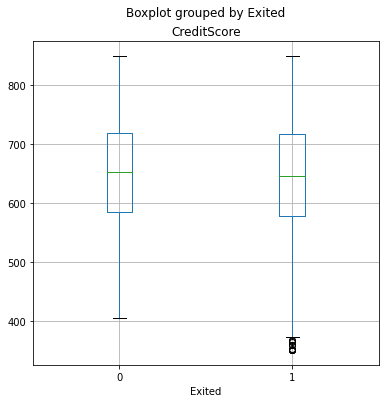

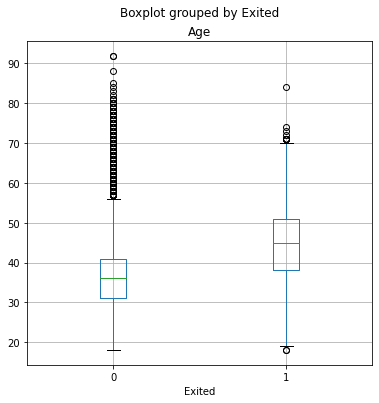

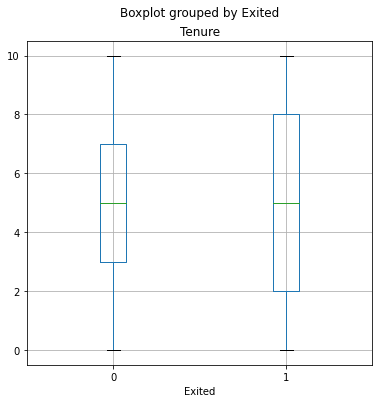

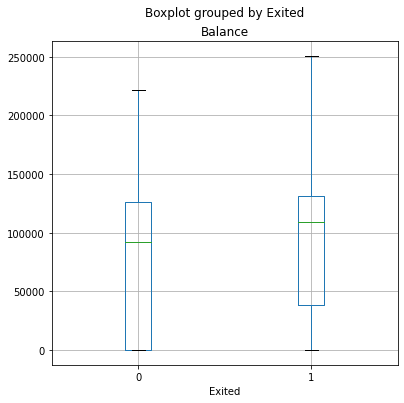

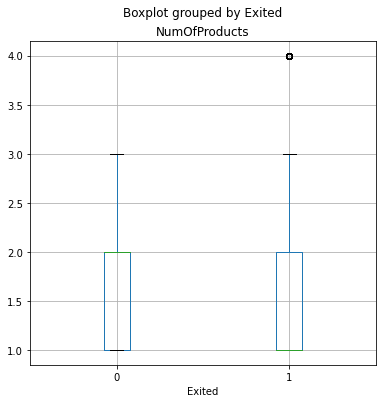

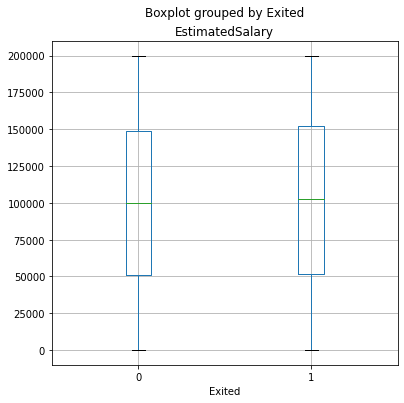

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
for col in features:
    Churn_df.boxplot(column=col, by='Exited', figsize=(6,6))
    plt.title(col)
plt.show()

**See Categorical Variables with respect to Exited. Code copied from Analytics Vidyha**

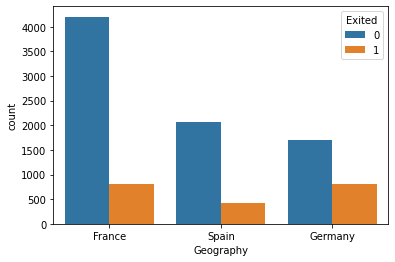

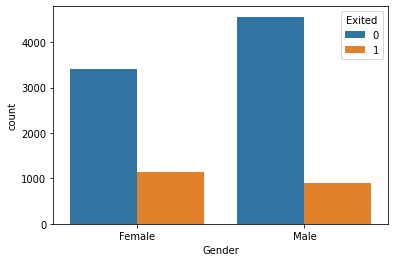

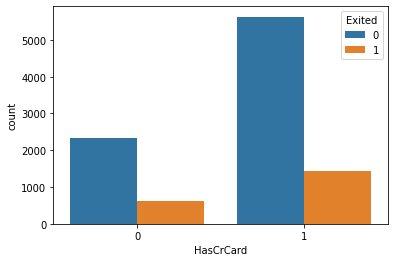

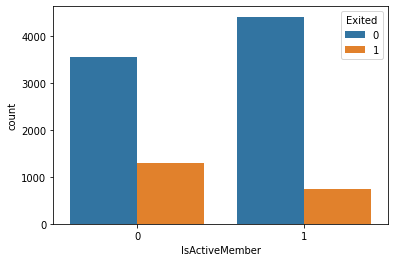

In [26]:
for i, predictor in enumerate(Churn_df.drop(columns = ['Exited','RowNumber','CustomerId','Surname','EstimatedSalary','CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'])):
    plt.figure(i)
    sns.countplot(data=Churn_df, x= predictor, hue = 'Exited')

**Drop row number, surname and customer id which do not have anything to do with churn**

In [27]:
Churn_df = Churn_df.drop(columns=['RowNumber','Surname','CustomerId'])

**Correlation values**

In [28]:
corrM = Churn_df.corr()
corrM = corrM.sort_values(by ='Exited',ascending=False)
print(corrM)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
Exited           -0.007138       -0.156128         0.012097  1.000000  
Age              -0.011721        0.085472        -0.007201  0.285323  
Balance      

**Create Correlation heatmap**

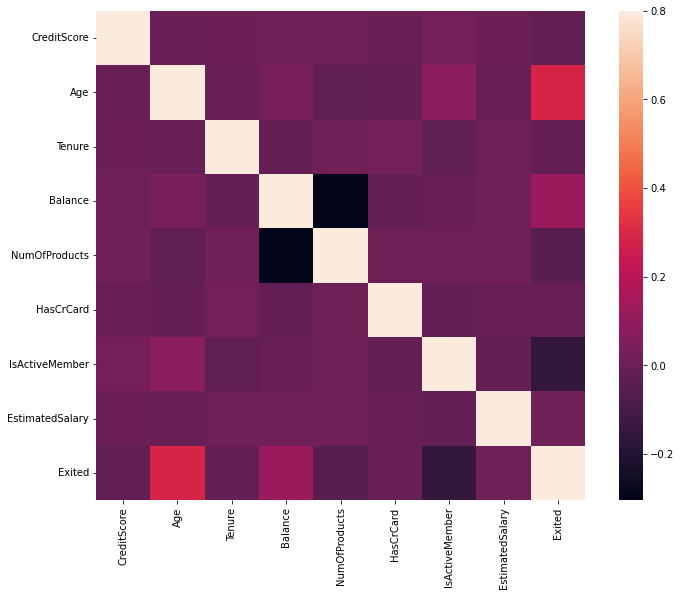

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = Churn_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8,  square=True);

**Create boxplots of Exited by Age, IsActiveMemeber,Balance and Credit Score**

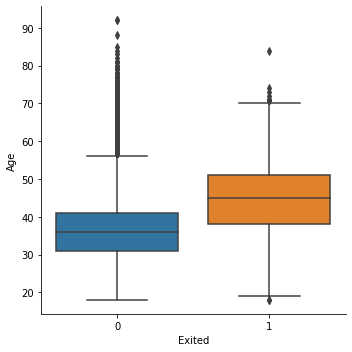

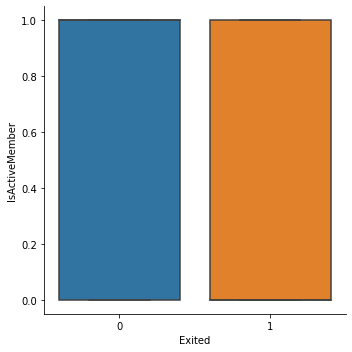

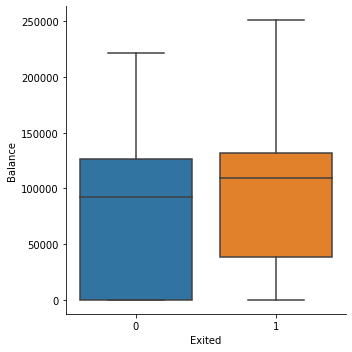

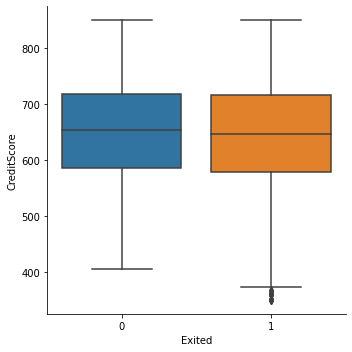

In [30]:
sns.catplot(x="Exited", y="Age",  kind="box",data=Churn_df)
sns.catplot(x="Exited", y="IsActiveMember",  kind="box",data=Churn_df)
sns.catplot(x="Exited", y="Balance",  kind="box",data=Churn_df);
sns.catplot(x="Exited", y="CreditScore",  kind="box",data=Churn_df);

**Show skewness**

In [31]:
print("Skewness: %f" % Churn_df['Balance'].skew())

Skewness: -0.141109


**Ordinal Encode Exited, Georgrphy and Gender**

In [32]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(Churn_df[['Exited']])
Churn_df[['Exited']] = enc.transform(Churn_df[['Exited']])

In [33]:
enc = OrdinalEncoder()
enc.fit(Churn_df[['Geography']])
Churn_df[['Geography']] = enc.transform(Churn_df[['Geography']])

In [34]:
enc = OrdinalEncoder()
enc.fit(Churn_df[['Gender']])
Churn_df[['Gender']] = enc.transform(Churn_df[['Gender']])

**Ooderdinal Enc Exited, Georgrphy and Gender**

In [35]:
Churn_df = Churn_df.astype({"Exited":"int","Gender":"int","Geography":"int"})


In [36]:
feature_cols  = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = Churn_df['Exited']
X = Churn_df[feature_cols]
y = target

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

**Model using a decision tree**

In [38]:
from sklearn import tree
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Determine Accuracy of model**

In [39]:
accuracy_score(y_test, y_pred)

0.8572

**Text representation of Decision Tree**

In [40]:
text_representation = tree.export_text(model)
print(text_representation)


|--- feature_3 <= 41.50
|   |--- feature_6 <= 2.50
|   |   |--- feature_6 <= 1.50
|   |   |   |--- feature_3 <= 34.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  34.50
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  1.50
|   |   |   |--- feature_5 <= 1884.34
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  1884.34
|   |   |   |   |--- class: 0
|   |--- feature_6 >  2.50
|   |   |--- feature_5 <= 23194.08
|   |   |   |--- feature_9 <= 168592.80
|   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  168592.80
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  23194.08
|   |   |   |--- feature_4 <= 5.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  5.50
|   |   |   |   |--- class: 1
|--- feature_3 >  41.50
|   |--- feature_6 <= 2.50
|   |   |--- feature_6 <= 1.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  1.50
|   |   |

**Create Confusion Matrix**

In [41]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1907,84,1991
1,273,236,509
All,2180,320,2500


**Metrics Classification of model**

In [42]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1991
           1       0.74      0.46      0.57       509

    accuracy                           0.86      2500
   macro avg       0.81      0.71      0.74      2500
weighted avg       0.85      0.86      0.84      2500



**Calculate ROC and create roc curve**

In [43]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

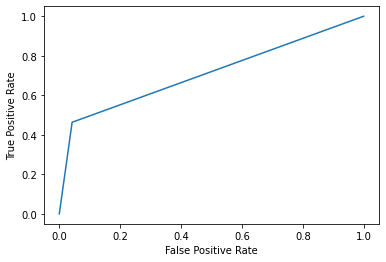

In [44]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Run Support Vector to see if it is more accurate than Decision tree** 

In [45]:
from sklearn.svm import SVC
model = SVC( )
model.fit(X_train, y_train)

SVC()

In [46]:
model.score(X_test, y_test)
kf=KFold(n_splits=5)
score=cross_val_score(model,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.78733333 0.79533333 0.81266667 0.78933333 0.79666667]
Average Cross Validation score :0.7962666666666667


**Run logistic regression with cross validation to see if it is more accurate than Decision tree** 

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold

logreg = LogisticRegression()
# logreg.fit(X_train,y_train)
# y_pred=logreg.predict(X_test)
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.77666667 0.79       0.80933333 0.78533333 0.79333333]
Average Cross Validation score :0.7909333333333334


**Run Random Forest to see if it is more accurate than Decision tree** 

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=170)
clf.fit(X_train,y_train);

**Random Forest appears to be the best at 86.36 vs 85.72 for decision tree**

In [49]:
y_pred=clf.predict(X_test)
Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (Accuracy*100))


Accuracy: 86.36


**Run Classification report for Random Forest**

In [50]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.75      0.50      0.60       509

    accuracy                           0.86      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



**use boosting ensemble**

In [51]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
print(results.mean())

0.8592000000000001


**Mean .8592 so it is near the top but not as good as Random Forest**